# EDAMI project
## Mining association rules with dEclat algorithm

Authors:
- Robert Wojtaś
- Jakub Sikora

#### Load modules

In [16]:
from Transactional import read_csv
from dEclat import dEclat, dEclatControl
from dEclat.Rules import rulesInduction, InductionControl

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Read data from .csv file and convert it to transactional format

In [21]:
db = read_csv("./data/mushrooms.csv")

#### Mine frequent itemsets with dEclat algorithm

In [38]:
DE_params = dEclatControl(support=0.5, minlen=1, maxlen=10)
frequentItemsets = dEclat(db, DE_params)

#### Induce rules from frequent itemsets

In [39]:
RI_params = InductionControl(confidence=0.4)
ruleset = rulesInduction(frequentItemsets, db, RI_params)

#### Convert ruleset to pandas data frame

In [40]:
df = ruleset.as_data_frame()
df.head()

,lhs,rhs,support,confidence
0,[gill-attachment=FREE],[class=EDIBLE],0.510456,0.523902
1,[class=EDIBLE],[gill-attachment=FREE],0.510456,0.957219
2,[veil-type=PARTIAL],[class=EDIBLE],0.533270,0.533270
3,[class=EDIBLE],[veil-type=PARTIAL],0.533270,1.000000
4,[veil-color=WHITE],[class=EDIBLE],0.510456,0.522882


#### Scatter plot of each rule: support vs confidence

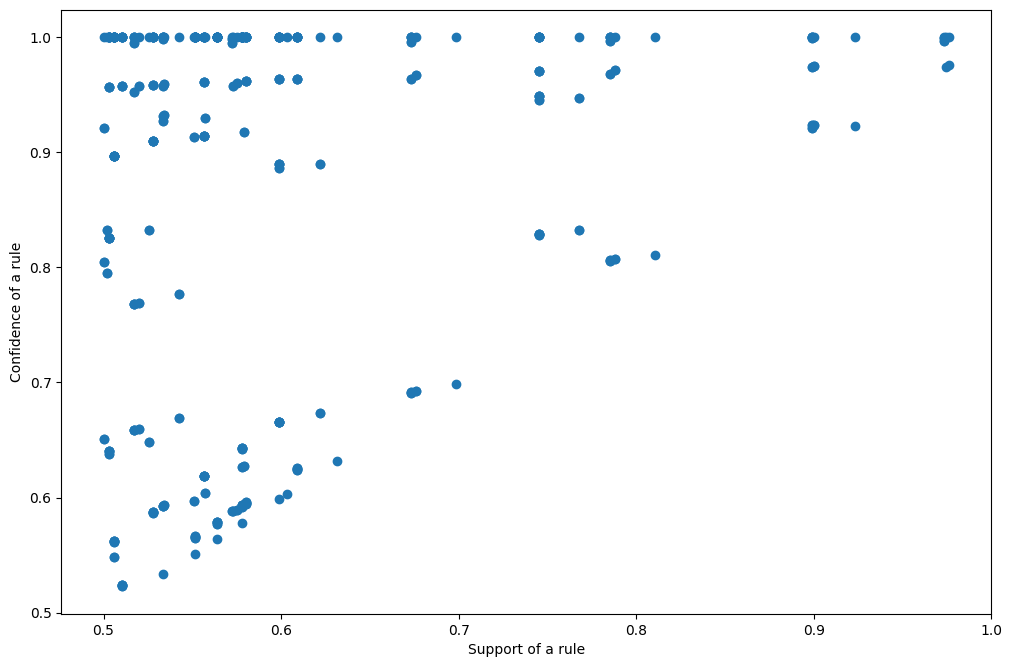

In [41]:
fig=plt.figure(figsize=(12,8), dpi=100)
plt.scatter(df["support"], df["confidence"])
plt.xlabel("Support of a rule")
plt.ylabel("Confidence of a rule")
plt.show()